In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install rasterio
!pip install netcdf4

In [11]:
!pip install rioxarray

In [12]:
!pip install xarray[complete]

In [13]:
!pip install h5netcdf scipy

In [14]:
!ls /content/drive/MyDrive/long_ndui/Las_Vegas/dmsp_swinIR_1992_2022_Las_Vegas.nc

/content/drive/MyDrive/long_ndui/Las_Vegas/dmsp_swinIR_1992_2022_Las_Vegas.nc


In [83]:
import pandas as pd
df = pd.read_csv('LVXRNSA.csv')
df.head()

,DATE,LVXRNSA
0,1987-01-01,66.358296
1,1987-02-01,67.030115
2,1987-03-01,67.335161
3,1987-04-01,67.882287
4,1987-05-01,67.898858


In [84]:
# Converting DATE to datetime format if not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Setting DATE as the index
df.set_index('DATE', inplace=True)

# Calculating the yearly average
yearly_avg_df = df.resample('Y').mean()

yearly_avg_df

<ipython-input-84-121f9c48dae1>:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_df = df.resample('Y').mean()


,LVXRNSA
DATE,
1987-12-31,66.609815
1988-12-31,67.579239
1989-12-31,71.653964
1990-12-31,78.963264
1991-12-31,82.611206
1992-12-31,82.972033
1993-12-31,82.769918
1994-12-31,85.501838
1995-12-31,88.241869


In [16]:
!ls /content/drive/MyDrive/Elvidge

F101992.v4b.global.intercal.stable_lights.avg_vis.tif
F101993.v4b.global.intercal.stable_lights.avg_vis.tif
F121994.v4b.global.intercal.stable_lights.avg_vis.tif
F121995.v4b.global.intercal.stable_lights.avg_vis.tif
F121996.v4b.global.intercal.stable_lights.avg_vis.tif
F141997.v4b.global.intercal.stable_lights.avg_vis.tif
F141998.v4b.global.intercal.stable_lights.avg_vis.tif
F141999.v4b.global.intercal.stable_lights.avg_vis.tif
F152000.v4b.global.intercal.stable_lights.avg_vis.tif
F152001.v4b.global.intercal.stable_lights.avg_vis.tif
F152002.v4b.global.intercal.stable_lights.avg_vis.tif
F152003.v4b.global.intercal.stable_lights.avg_vis.tif
F15_20130101_20131231.global.stable_lights.avg_vis.tif
F15_20140101_20141231.global.stable_lights.avg_vis.tif
F15_20150101_20151231.global.stable_lights.avg_vis.tif
F15_20160101_20161231.global.stable_lights.avg_vis.tif
F15_20170101_20171231.global.stable_lights.avg_vis.tif
F15_20180101_20181231.global.stable_lights.avg_vis.tif
F15_20190101_20191231.

# Elvidge data

In [17]:
data_folder = '/content/drive/MyDrive/Elvidge/'

In [18]:
import os
import xarray as xr
import rioxarray
file_path_1992 = os.path.join(data_folder, 'F101992.v4b.global.intercal.stable_lights.avg_vis.tif')
da_1992 = rioxarray.open_rasterio(file_path_1992,  chunks={'x': 100, 'y': 100})
da1_1992 = da_1992.assign_coords(year=1992)
da2_1992 = da1_1992.expand_dims('year')


In [19]:
di = da_1992.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref'])
di

<ipython-input-19-0b8753f0d8b6>:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  di = da_1992.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref'])


<xarray.DataArray (y: 600, x: 600)> Size: 1MB
dask.array<getitem, shape=(600, 600), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [60]:
da3_1992=da2_1992.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})

<ipython-input-60-21b534729e2d>:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1992=da2_1992.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


In [20]:
da_1993 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F101993.v4b.global.intercal.stable_lights.avg_vis.tif",chunks={'x':100,'y':100})
da1_1993 = da_1993.assign_coords(year=1993)
da2_1993=da1_1993.expand_dims('year')
da3_1993=da2_1993.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1993 = da2_1993.sel(band=1).drop(['band','spatial_ref'])
da3_1993
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F101993_Austin.nc')

<ipython-input-20-04e685dedd29>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1993=da2_1993.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1993
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [21]:
da_1994 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F121994.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1994 = da_1994.assign_coords(year=1994)
da2_1994=da1_1994.expand_dims('year')
da3_1994=da2_1994.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1994 = da2_1994.sel(band=1).drop(['band','spatial_ref'])
da3_1994
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F121994_Austin.nc')

<ipython-input-21-ff0d00afc9b7>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1994=da2_1994.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1994
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [22]:
da_1995 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F121995.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1995 = da_1995.assign_coords(year=1995)
da2_1995=da1_1995.expand_dims('year')
da3_1995=da2_1995.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1995 = da2_1995.sel(band=1).drop(['band','spatial_ref'])
da3_1995
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F121995_Austin.nc')

<ipython-input-22-3859141e6011>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1995=da2_1995.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1995
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [23]:
da_1996 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F121996.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1996 = da_1996.assign_coords(year=1996)
da2_1996=da1_1996.expand_dims('year')
da3_1996=da2_1996.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1996 = da2_1996.sel(band=1).drop(['band','spatial_ref'])
da3_1996
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F121996_Austin.nc')

<ipython-input-23-19868413e28e>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1996=da2_1996.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1996
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [24]:
da_1997 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F141997.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1997 = da_1997.assign_coords(year=1997)
da2_1997=da1_1997.expand_dims('year')
da3_1997=da2_1997.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1997 = da2_1997.sel(band=1).drop(['band','spatial_ref'])
da3_1997
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F141997_Austin.nc')

<ipython-input-24-8a3461648192>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1997=da2_1997.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1997
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [25]:
da_1998 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F141998.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1998 = da_1998.assign_coords(year=1998)
da2_1998=da1_1998.expand_dims('year')
da3_1998=da2_1998.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1998 = da2_1998.sel(band=1).drop(['band','spatial_ref'])
da3_1998
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F141998_Austin.nc')

<ipython-input-25-f07399373a19>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1998=da2_1998.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1998
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [26]:
da_1999 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F141999.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_1999 = da_1999.assign_coords(year=1999)
da2_1999=da1_1999.expand_dims('year')
da3_1999=da2_1999.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_1999 = da2_1999.sel(band=1).drop(['band','spatial_ref'])
da3_1999
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F141999_Austin.nc')

<ipython-input-26-8420a8ed5584>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_1999=da2_1999.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 1999
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [27]:
da_2000 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F152000.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2000 = da_2000.assign_coords(year=2000)
da2_2000=da1_2000.expand_dims('year')
da3_2000=da2_2000.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2000 = da2_2000.sel(band=1).drop(['band','spatial_ref'])
da3_2000
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152000_Austin.nc')

<ipython-input-27-49adcfa668ef>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2000=da2_2000.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2000
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [28]:
da_2001 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F152001.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2001 = da_2001.assign_coords(year=2001)
da2_2001=da1_2001.expand_dims('year')
da3_2001=da2_2001.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2001 = da2_2001.sel(band=1).drop(['band','spatial_ref'])
da3_2001
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152001_Austin.nc')

<ipython-input-28-915e5f3eb87c>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2001=da2_2001.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2001
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [29]:
da_2002 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F152002.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2002 = da_2002.assign_coords(year=2002)
da2_2002=da1_2002.expand_dims('year')
da3_2002=da2_2002.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2002 = da2_2002.sel(band=1).drop(['band','spatial_ref'])
da3_2002
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152002_Austin.nc')

<ipython-input-29-2d1bc8a34636>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2002=da2_2002.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2002
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [30]:
da_2003 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F152003.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2003 = da_2003.assign_coords(year=2003)
da2_2003=da1_2003.expand_dims('year')
da3_2003=da2_2003.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2003 = da2_2003.sel(band=1).drop(['band','spatial_ref'])
da3_2003
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152003_Austin.nc')

<ipython-input-30-fe0177c81599>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2003=da2_2003.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2003
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [31]:
da_2004 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162004.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2004 = da_2004.assign_coords(year=2004)
da2_2004=da1_2004.expand_dims('year')
da3_2004=da2_2004.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2004 = da2_2004.sel(band=1).drop(['band','spatial_ref'])
da3_2004
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162004_Austin.nc')

<ipython-input-31-33af7aec4e9f>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2004=da2_2004.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2004
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [32]:
da_2005 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162005.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2005 = da_2005.assign_coords(year=2005)
da2_2005=da1_2005.expand_dims('year')
da3_2005=da2_2005.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2005 = da2_2005.sel(band=1).drop(['band','spatial_ref'])
da3_2005
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162005_Austin.nc')

<ipython-input-32-e14b182ae1f3>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2005=da2_2005.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2005
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [33]:
da_2006 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162006.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2006 = da_2006.assign_coords(year=2006)
da2_2006=da1_2006.expand_dims('year')
da3_2006=da2_2006.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2006 = da2_2006.sel(band=1).drop(['band','spatial_ref'])
da3_2006
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162006_Austin.nc')

<ipython-input-33-84be74435a63>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2006=da2_2006.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2006
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [34]:
da_2007 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162007.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2007 = da_2007.assign_coords(year=2007)
da2_2007=da1_2007.expand_dims('year')
da3_2007=da2_2007.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2007 = da2_2007.sel(band=1).drop(['band','spatial_ref'])
da3_2007
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162007_Austin.nc')

<ipython-input-34-4cfa0fbecd22>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2007=da2_2007.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2007
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [35]:
da_2008 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162008.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2008= da_2008.assign_coords(year=2008)
da2_2008=da1_2008.expand_dims('year')
da3_2008=da2_2008.sel(band=1,x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2008 = da2_2008.sel(band=1).drop(['band','spatial_ref'])
da3_2008
# .to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162008_Austin.nc')

<ipython-input-35-3c485fd46752>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2008=da2_2008.sel(band=1,x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2008
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [36]:
da_2009 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F162009.v4b.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2009= da_2009.assign_coords(year=2009)
da2_2009=da1_2009.expand_dims('year')
da3_2009=da2_2009.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2009 = da2_2009.sel(band=1).drop(['band','spatial_ref'])
# da3_2009.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F162009_Austin.nc')
da3_2009

<ipython-input-36-f94c0251c157>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2009=da2_2009.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2009
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [37]:
da_2010 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F182010.v4d.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2010= da_2010.assign_coords(year=2010)
da2_2010=da1_2010.expand_dims('year')
da3_2010=da2_2010.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2010 = da2_2010.sel(band=1).drop(['band','spatial_ref'])
# da3_2010.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F182010_Austin.nc')
da3_2010

<ipython-input-37-741ef637b71f>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2010=da2_2010.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2010
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    Band_1:         Mask (Band Math ((2.34581+(0.509999*b1)+(0.00647*b1^2))):...
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Mask (Band Math ((2.34581+(0.509999*b1)+(0.00647*b1^2))):...

In [38]:
da_2011 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F182011.v4c.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2011= da_2011.assign_coords(year=2011)
da2_2011=da1_2011.expand_dims('year')
da3_2011=da2_2011.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2011 = da2_2011.sel(band=1).drop(['band','spatial_ref'])
# da3_2011.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F182011_Austin.nc')
da3_2011

<ipython-input-38-72d7b9690b69>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2011=da2_2011.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2011
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [39]:
da_2012 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F182012.v4c.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2012= da_2012.assign_coords(year=2012)
da2_2012=da1_2012.expand_dims('year')
da3_2012=da2_2012.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2012 = da2_2012.sel(band=1).drop(['band','spatial_ref'])
# da3_2012.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F182012_Austin.nc')
da3_2012

<ipython-input-39-0d2b03c79c70>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2012=da2_2012.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2012
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [40]:
da_2013 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F182013.v4c.global.intercal.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2013= da_2013.assign_coords(year=2013)
da2_2013=da1_2013.expand_dims('year')
da3_2013=da2_2013.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2013 = da2_2013.sel(band=1).drop(['band','spatial_ref'])
# da3_2013.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F182013_Austin.nc')
da3_2013

<ipython-input-40-46d082011cb6>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2013=da2_2013.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2013
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    Band_1:         Mask (Band Math (1.84108+b1*.70493+b1^2*.00331362):F18201...
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Mask (Band Math (1.84108+b1*.70493+b1^2*.00331362):F18201...

In [41]:
da_2014 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20140101_20141231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2014 = da_2014.assign_coords(year=2014)
da2_2014=da1_2014.expand_dims('year')
da3_2014=da2_2014.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2014.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152014_Austin.nc')
da3_2014

<ipython-input-41-e3383eb6f9af>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2014=da2_2014.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2014
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    AREA_OR_POINT:        Area
    scale_factor:         1.0
    add_offset:           0.0

In [42]:
da_2015 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20150101_20151231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2015 = da_2015.assign_coords(year=2015)
da2_2015=da1_2015.expand_dims('year')
da3_2015=da2_2015.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2015.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152015_Austin.nc')
da3_2015

<ipython-input-42-46150855f632>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2015=da2_2015.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2015
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    AREA_OR_POINT:        Area
    scale_factor:         1.0
    add_offset:           0.0

In [43]:
da_2016 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20160101_20161231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2016 = da_2016.assign_coords(year=2016)
da2_2016=da1_2016.expand_dims('year')
da3_2016=da2_2016.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2016.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152016_Austin.nc')
da3_2016

<ipython-input-43-a997e7703818>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2016=da2_2016.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2016
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_DOCUMENTNAME:      ./F15_20160101_20161231.v4.stable_lights.avg_v...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2020:06:24 14:25:38
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

In [44]:
da_2017 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20170101_20171231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2017 = da_2017.assign_coords(year=2017)
da2_2017=da1_2017.expand_dims('year')
da3_2017=da2_2017.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2017.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152017_Austin.nc')
da3_2017

<ipython-input-44-e52abb5c2f6b>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2017=da2_2017.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2017
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    AREA_OR_POINT:        Area
    scale_factor:         1.0
    add_offset:           0.0

In [45]:
da_2018 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20180101_20181231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2018 = da_2018.assign_coords(year=2018)
da2_2018=da1_2018.expand_dims('year')
da3_2018=da2_2018.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2018.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152018_Austin.nc')
da3_2018

<ipython-input-45-66e414ef521a>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2018=da2_2018.sel(band=1, x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2018
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_DOCUMENTNAME:      ./F15_2018.v4b.stable_lights.avg_vis.tif
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.7.2, Harris Geospatial Solutions, Inc.
    TIFFTAG_DATETIME:          2020:09:18 14:57:31
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

In [46]:
da_2019 = rioxarray.open_rasterio("/content/drive/MyDrive/Elvidge/F15_20190101_20191231.global.stable_lights.avg_vis.tif", engine="rasterio",chunks={'x':100,'y':100})
da1_2019 = da_2019.assign_coords(year=2019)
da2_2019=da1_2019.expand_dims('year')
da3_2019=da2_2019.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})
# da3_2019.to_netcdf('/content/drive/MyDrive/Elvidge/Elvidge_F152019_Austin.nc')
da3_2019

<ipython-input-46-8fb2bce0f3f8>:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da3_2019=da2_2019.sel(band=1,  x=slice(-115.1391-2.5, -115.1391+2.5), y=slice(36.1716+2.5, 36.1716-2.5)).drop(['band','spatial_ref']).interp(x=di.x.values, y = di.y.values, method = 'cubic',kwargs={'fill_value':'extrapolate'})


<xarray.DataArray (year: 1, y: 600, x: 600)> Size: 1MB
dask.array<transpose, shape=(1, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 8B 2019
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    TIFFTAG_XRESOLUTION:  1
    TIFFTAG_YRESOLUTION:  1
    AREA_OR_POINT:        Area
    scale_factor:         1.0
    add_offset:           0.0

In [61]:
de = xr.concat([da3_1992, da3_1993, da3_1994, da3_1995, da3_1996, da3_1997, da3_1998, da3_1999, da3_2000,
                           da3_2001, da3_2002, da3_2003, da3_2004, da3_2005, da3_2006, da3_2007, da3_2008, da3_2009,
                           da3_2010, da3_2011, da3_2012, da3_2013, da3_2014, da3_2015,  da3_2016, da3_2017, da3_2018,
                           da3_2019], dim= 'year').sortby('year')
de

<xarray.DataArray (year: 28, y: 600, x: 600)> Size: 40MB
dask.array<getitem, shape=(28, 600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 224B 1992 1993 1994 1995 1996 ... 2016 2017 2018 2019
  * x        (x) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * y        (y) float64 5kB 38.67 38.66 38.65 38.64 ... 33.7 33.69 33.68 33.68
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [62]:
de1 = de.mean(['x','y'])
de1

<xarray.DataArray (year: 28)> Size: 112B
dask.array<mean_agg-aggregate, shape=(28,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 224B 1992 1993 1994 1995 1996 ... 2016 2017 2018 2019

In [63]:
data = xr.open_dataset('/content/drive/MyDrive/long_ndui/ds_dmsp_1992_2023_LasVegas.nc')
data

<xarray.Dataset> Size: 89MB
Dimensions:  (lat: 600, lon: 600, time: 31)
Coordinates:
  * lat      (lat) float64 5kB 38.7 38.69 38.68 38.67 ... 33.73 33.72 33.71 33.7
  * lon      (lon) float64 5kB -117.6 -117.6 -117.6 ... -112.7 -112.7 -112.6
  * time     (time) datetime64[ns] 248B 1992-01-01 1993-01-01 ... 2022-01-01
Data variables:
    dmsp     (time, lat, lon) float64 89MB ...

In [64]:
data1= data.mean(['lat','lon'])
data1

<xarray.Dataset> Size: 496B
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 248B 1992-01-01 1993-01-01 ... 2022-01-01
Data variables:
    dmsp     (time) float64 248B 2.125 2.101 2.081 2.083 ... 2.134 2.239 2.285

In [65]:
data2= data1.groupby(data1.time.dt.year).mean('time')
data2

<xarray.Dataset> Size: 496B
Dimensions:  (year: 31)
Coordinates:
  * year     (year) int64 248B 1992 1993 1994 1995 1996 ... 2019 2020 2021 2022
Data variables:
    dmsp     (year) float64 248B 2.125 2.101 2.081 2.083 ... 2.134 2.239 2.285

In [66]:
data2= data1.groupby(data1.time.dt.year).mean('time')
data2

<xarray.Dataset> Size: 496B
Dimensions:  (year: 31)
Coordinates:
  * year     (year) int64 248B 1992 1993 1994 1995 1996 ... 2019 2020 2021 2022
Data variables:
    dmsp     (year) float64 248B 2.125 2.101 2.081 2.083 ... 2.134 2.239 2.285

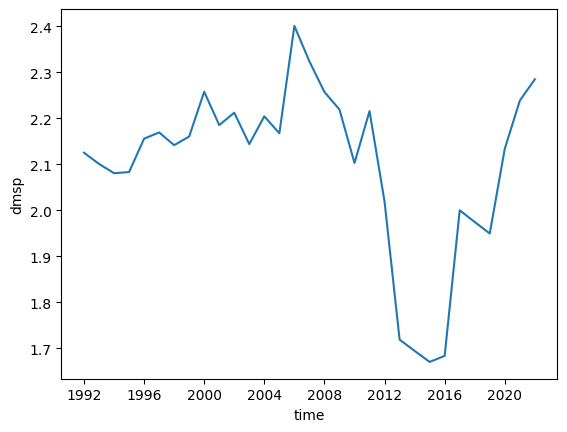

In [67]:
data1.dmsp.plot()

In [68]:
de1.load()

<xarray.DataArray (year: 28)> Size: 112B
array([2.2700434, 2.2784338, 2.0713036, 2.2723062, 2.3216863, 2.3353376,
       2.3392189, 2.3298953, 2.3449152, 2.2492063, 2.2656727, 2.305525 ,
       2.2233145, 2.228284 , 2.320229 , 2.3075325, 2.2710657, 2.2684374,
       2.3211484, 2.298801 , 2.1908207, 2.2134268, 1.7725126, 1.7487613,
       1.7562118, 1.7438444, 1.7553573, 1.7471715], dtype=float32)
Coordinates:
  * year     (year) int64 224B 1992 1993 1994 1995 1996 ... 2016 2017 2018 2019

In [90]:
df[5:]

,LVXRNSA
DATE,
1987-06-01,66.477159
1987-07-01,65.432832
1987-08-01,65.136055
1987-09-01,65.854914
1987-10-01,66.209792
...,...
2024-04-01,292.559716
2024-05-01,296.133259
2024-06-01,298.638989


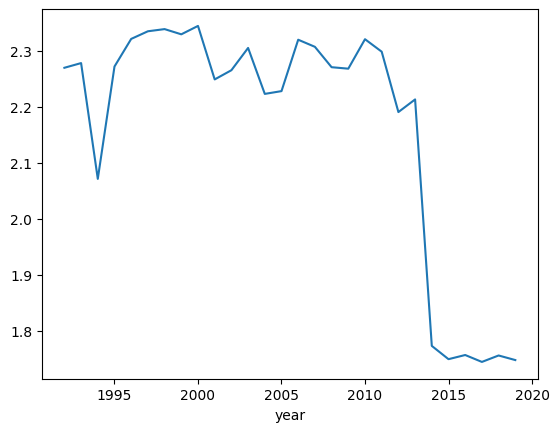

In [70]:
de1.plot()

In [97]:
de1['las_vegas'] = (('year'), yearly_avg_df[5:-5].values.flatten())

In [96]:
yearly_avg_df[5:-5].values.flatten()

array([ 82.97203292,  82.7699175 ,  85.50183833,  88.24186892,
        89.77332083,  92.1109825 ,  94.54940717,  97.95846283,
       102.83686   , 109.75982333, 117.21095417, 129.89879417,
       183.74987583, 219.8602575 , 233.20383083, 218.24258417,
       156.89577167, 110.208215  , 101.74176925,  95.11326925,
        94.86786425, 117.871595  , 134.41448441, 142.3381667 ,
       150.5583211 , 162.75398825, 183.13953148, 192.98226166])

In [93]:
yearly_avg_df[5:-5]

,LVXRNSA
DATE,
1992-12-31,82.972033
1993-12-31,82.769918
1994-12-31,85.501838
1995-12-31,88.241869
1996-12-31,89.773321
1997-12-31,92.110982
1998-12-31,94.549407
1999-12-31,97.958463
2000-12-31,102.836860


In [80]:
data1

<xarray.Dataset> Size: 496B
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 248B 1992-01-01 1993-01-01 ... 2022-01-01
Data variables:
    dmsp     (time) float64 248B 2.125 2.101 2.081 2.083 ... 2.134 2.239 2.285

In [102]:
de1['dmsp'] = (('year'), data1.dmsp.sel(time=slice('1992','2019')).values.flatten())

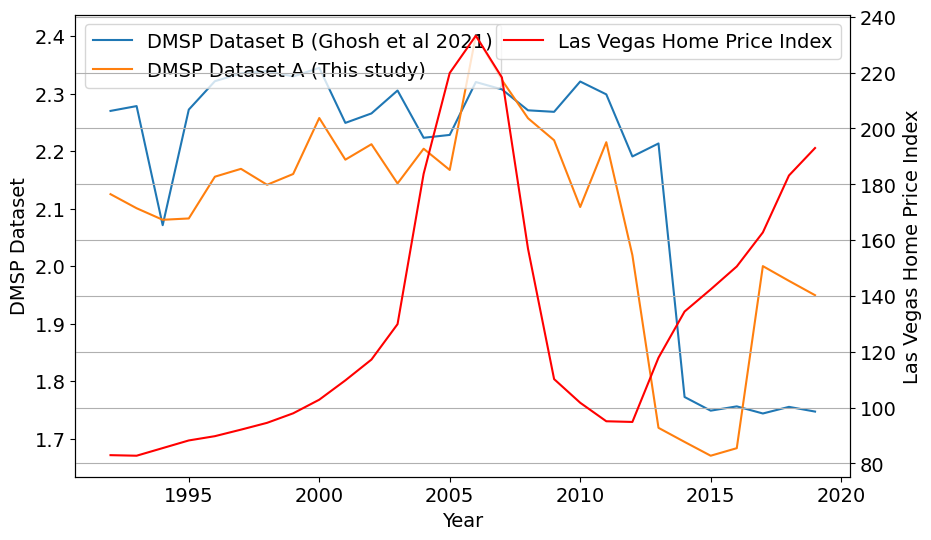

In [120]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the data
de1.plot(ax=ax1, label='DMSP Dataset B (Ghosh et al 2021)')
de1['dmsp'].plot(ax=ax1, label='DMSP Dataset A (This study)')

# Secondary y-axis
ax2 = ax1.twinx()
de1['las_vegas'].plot(ax=ax2, label='Las Vegas Home Price Index', color='red')
ax2.tick_params(axis='y', labelsize=14)

# Legends
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="upper right", fontsize=14)

# Labels with increased font size
ax1.set_ylabel('DMSP Dataset', fontsize=14)
ax2.set_ylabel('Las Vegas Home Price Index', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

# Tick labels font size
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Grid and saving
plt.grid()
plt.savefig('dmsp_home_price.png', dpi=500)
